In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from selenium import webdriver
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time
from datetime import datetime
from tqdm import tqdm
from time import time
import pickle

In [2]:
class tns_scraping(object):
    
    def __init__(self):
        self.driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver")
        
    def get_reporting_date(self, TNS_name):
        self.driver.get("https://wis-tns.weizmann.ac.il/object/"+str(TNS_name)+"/discovery-cert")
        content = self.driver.page_source
        soup = BeautifulSoup(content)
        text = soup.get_text()
        index = text.find('Date Received')
        size = 40
        full_date = soup.get_text()[index:index+size]
        date, time = full_date.split(" ")[-2:]
        return date, time


In [10]:
all_alerce = pd.read_pickle("all_alerce.pkl")
summary_alerce = pd.read_pickle("alerce_summary_tns.pkl")

In [11]:
all_alerce.columns

Index(['ID', 'Name', 'RA', 'DEC', 'Obj. Type', 'Redshift', 'Host Name',
       'Host Redshift', 'Reporting Group/s', 'Discovery Data Source/s',
       'Classifying Group/s', 'Associated Group/s', 'Disc. Internal Name',
       'Disc. Instrument/s', 'Class. Instrument/s', 'TNS AT', 'Public',
       'End Prop. Period', 'Discovery Mag/Flux', 'Discovery Filter',
       'Discovery Date (UT)', 'Sender', 'Remarks', 'Ext. catalog/s', 'url'],
      dtype='object')

In [5]:
all_alerce["Disc. Internal Name"]

0     ZTF20aaskdgf
1     ZTF20aasmgqk
2     ZTF20aasoaeu
3     ZTF20aaspdtp
4     ZTF20aaskbht
          ...     
42    ZTF19abjklyz
43    ZTF19abjobyp
44    ZTF19abjppqv
45    ZTF19abjpqlc
46    ZTF19abjquxy
Name: Disc. Internal Name, Length: 2026, dtype: object

In [6]:
summary_alerce

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,dec,dt_first_max,dmag_first_max,mag_at_max,dmdt_fid
0,ZTF20aaskdgf,1,8.969768,NaN,0.314535,9.009305,0.528034,58913.141944,19.593266,67.270614,-12.543713,0.000000,0.000000,19.593266,0.058610
1,ZTF20aasmgqk,1,0.041782,NaN,1.305998,0.986863,1.561897,58913.276944,18.544903,162.499881,23.431558,0.000000,0.000000,18.544903,1.582688
2,ZTF20aasoaeu,1,13.047940,NaN,0.811230,21.090706,-0.403469,58913.424155,19.380569,187.632292,-17.220212,0.000000,0.000000,19.380569,-0.019130
3,ZTF20aaspdtp,1,0.960532,NaN,2.034286,1.001481,1.682087,58913.497350,18.730513,252.476105,53.946731,0.000000,0.000000,18.730513,1.679599
4,ZTF20aaskbht,1,7.998947,NaN,0.273787,7.998947,0.273787,58913.130289,19.187313,38.255634,21.328905,0.000000,0.000000,19.187313,0.034228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,ZTF19abjklyz,3,6.858507,9.953102,-0.542484,6.858507,-0.542484,58693.323009,20.741085,330.443201,29.849292,3.094595,0.365274,20.375811,-0.079097
2022,ZTF19abjobyp,1,2.937280,NaN,-0.100792,3.013194,-0.045492,58693.394329,20.273191,336.647484,-5.944884,0.000000,0.000000,20.273191,-0.015098
2023,ZTF19abjppqv,11,2.994062,5.975822,0.305964,2.994062,0.305964,58693.457072,19.898537,18.495533,-2.156206,10.042234,0.545441,19.353096,0.102190
2024,ZTF19abjpqlc,6,7.042199,12.015474,-2.207703,7.042199,-2.207703,58693.459965,20.039202,348.160126,-26.859484,15.021053,0.478817,19.560385,-0.313496


In [7]:
scraper = tns_scraping()

reporting_time = []
reporting_date = []

for ztf_name in tqdm(summary_alerce["oid"]):
    tns_name = all_alerce[all_alerce["Disc. Internal Name"]==ztf_name]
    tns_name = tns_name["Name"].values[0].split(" ")[-1]
    
    rep_date, rep_time = scraper.get_reporting_date(tns_name)
    reporting_time.append(rep_time)
    reporting_date.append(rep_date)
    
    time.sleep(np.random.uniform(low=0, high=3))

KeyboardInterrupt: 

In [ ]:
import pickle
pickle.dump({"reporting_time": reporting_time, "reporting_date": reporting_date},
           open("alerce_reporting_time.pkl", "wb"),
           protocol=2)

In [ ]:
len(reporting_time), len(reporting_date)

In [ ]:
scraper = tns_scraping()

all_ztf = pd.read_pickle("all_ztf.pkl")
summary_ztf = pd.read_pickle("ztf_summary_tns.pkl")



In [ ]:
len(all_ztf), len(summary_ztf)

In [ ]:
reporting_time = []
reporting_date = []

for ztf_name in tqdm(summary_ztf["oid"]):
    tns_name = all_ztf[all_ztf["Disc. Internal Name"]==ztf_name]
    tns_name = tns_name["Name"].values[0].split(" ")[-1]
    
    rep_date, rep_time = scraper.get_reporting_date(tns_name)
    reporting_time.append(rep_time)
    reporting_date.append(rep_date)
    
    time.sleep(np.random.uniform(low=0, high=3))
    

pickle.dump({"reporting_time": reporting_time, "reporting_date": reporting_date},
           open("ztf_reporting_time.pkl", "wb"),
           protocol=2)

# Loading results

In [12]:
all_alerce = pd.read_pickle("all_alerce.pkl")
summary_alerce = pd.read_pickle("alerce_summary_tns.pkl")

all_ztf = pd.read_pickle("all_ztf.pkl")
summary_ztf = pd.read_pickle("ztf_summary_tns.pkl")

reported_alerce = pd.read_pickle("alerce_reporting_time.pkl")
reported_ztf = pd.read_pickle("ztf_reporting_time.pkl")

In [13]:
summary_alerce["first_UT"] = summary_alerce.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)
summary_ztf["first_UT"] = summary_ztf.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)

In [14]:
reported_alerce["reporting_date"][:5], reported_alerce["reporting_time"][:5]

(['2020-03-05', '2020-03-05', '2020-03-05', '2020-03-05', '2020-03-05'],
 ['17:48:55', '17:48:55', '17:48:55', '17:48:55', '17:48:55'])

In [15]:
alerce_rep_utc = []
for i in range(len(reported_alerce["reporting_date"])):
    alerce_rep_utc.append(reported_alerce["reporting_date"][i]+"T"+reported_alerce["reporting_time"][i])
print(alerce_rep_utc)

['2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-05T17:48:55', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-04T17:43:50', '2020-03-03T18:47:10', '2020-03-03T18:47:10', '2020-03-03T18:47:10', '2020-03-03T18:47:10', '2020-03-03T18:47:10', '2020-03-0

In [16]:
t_alerce = Time(alerce_rep_utc, format='isot', scale='utc')
t_alerce.mjd, len(t_alerce)

(array([58913.74230324, 58913.74230324, 58913.74230324, ...,
        58698.38965278, 58698.38965278, 58698.38965278]),
 2026)

In [17]:
summary_alerce.columns

Index(['oid', 'nobs', 'dt', 'dt2', 'dmag', 'dt_fid', 'dmag_fid', 'first_mjd',
       'first_det_mag', 'ra', 'dec', 'dt_first_max', 'dmag_first_max',
       'mag_at_max', 'dmdt_fid', 'first_UT'],
      dtype='object')

In [18]:
summary_alerce.columns

Index(['oid', 'nobs', 'dt', 'dt2', 'dmag', 'dt_fid', 'dmag_fid', 'first_mjd',
       'first_det_mag', 'ra', 'dec', 'dt_first_max', 'dmag_first_max',
       'mag_at_max', 'dmdt_fid', 'first_UT'],
      dtype='object')

In [19]:
summary_alerce.dt, summary_alerce.first_mjd

(0        8.969768
 1        0.041782
 2       13.047940
 3        0.960532
 4        7.998947
           ...    
 2021     6.858507
 2022     2.937280
 2023     2.994062
 2024     7.042199
 2025     0.027651
 Name: dt, Length: 2026, dtype: float64,
 0       58913.141944
 1       58913.276944
 2       58913.424155
 3       58913.497350
 4       58913.130289
             ...     
 2021    58693.323009
 2022    58693.394329
 2023    58693.457072
 2024    58693.459965
 2025    58693.482431
 Name: first_mjd, Length: 2026, dtype: float64)

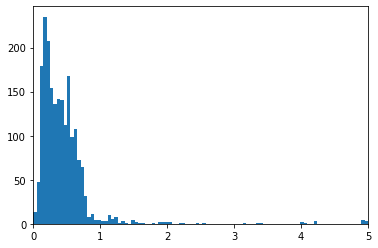

In [20]:
upper_bound = 5
bins = np.linspace(0, upper_bound, num=100)
plt.hist(t_alerce.mjd - summary_alerce.first_mjd, bins=bins)
plt.xlim([0, upper_bound])
plt.show()

In [21]:
ztf_rep_utc = []
for i in range(len(reported_ztf["reporting_date"])):
    ztf_rep_utc.append(reported_ztf["reporting_date"][i]+"T"+reported_ztf["reporting_time"][i])
print(ztf_rep_utc)
t_ztf = Time(ztf_rep_utc, format='isot', scale='utc')
t_ztf.mjd, len(t_ztf)

['2020-03-05T06:13:44', '2020-03-05T05:13:44', '2020-03-05T05:13:44', '2020-03-05T04:13:43', '2020-03-05T04:13:41', '2020-03-05T04:13:41', '2020-03-05T04:13:41', '2020-03-05T04:00:26', '2020-03-04T13:14:35', '2020-03-04T13:14:35', '2020-03-04T13:14:35', '2020-03-04T13:14:35', '2020-03-04T13:14:35', '2020-03-04T13:14:35', '2020-03-04T13:14:35', '2020-03-04T13:14:35', '2020-03-04T13:14:35', '2020-03-04T13:14:31', '2020-03-04T13:14:31', '2020-03-04T13:14:31', '2020-03-04T13:14:25', '2020-03-04T12:14:03', '2020-03-04T07:13:49', '2020-03-04T07:13:46', '2020-03-04T06:13:39', '2020-03-04T05:13:45', '2020-03-04T05:13:41', '2020-03-04T05:13:41', '2020-03-04T05:13:41', '2020-03-04T04:13:40', '2020-03-04T04:13:40', '2020-03-03T22:01:29', '2020-03-03T22:01:11', '2020-03-03T22:01:03', '2020-03-03T22:00:55', '2020-03-03T14:13:27', '2020-03-03T14:13:27', '2020-03-03T14:13:26', '2020-03-03T13:14:02', '2020-03-03T13:14:02', '2020-03-03T13:14:02', '2020-03-03T13:14:02', '2020-03-03T13:13:50', '2020-03-0

(array([58913.25953704, 58913.21787037, 58913.21787037, ...,
        58432.59761574, 58429.61975694, 58270.14756944]),
 8183)

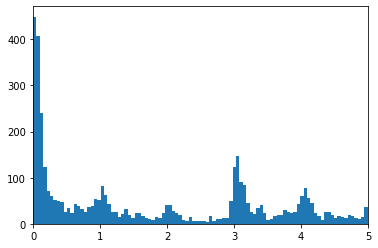

In [22]:
upper_bound = 5
bins = np.linspace(0, upper_bound, num=100)
plt.hist(t_ztf.mjd - summary_ztf.first_mjd, bins=bins)
plt.xlim([0, upper_bound])
plt.show()

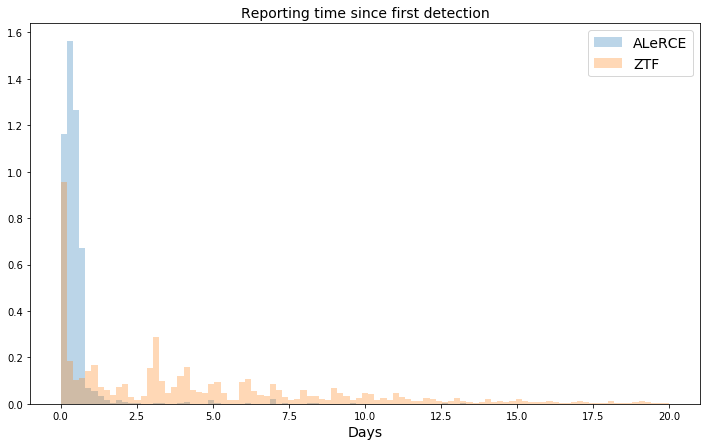

In [23]:
upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.hist(t_alerce.mjd - summary_alerce.first_mjd, bins=bins, label="ALeRCE", alpha=0.3, density=True)
ax.hist(t_ztf.mjd - summary_ztf.first_mjd, bins=bins, label="ZTF", alpha=0.3, density=True)
ax.set_xlabel("Days", fontsize=14)
ax.set_title("Reporting time since first detection", fontsize=14)
ax.legend(fontsize=14)

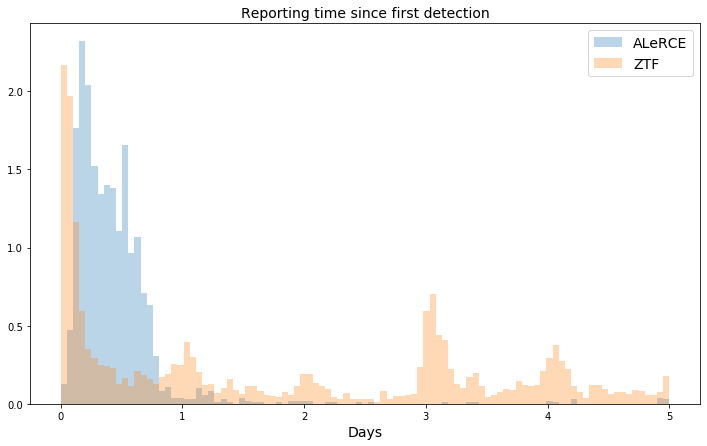

In [24]:
upper_bound=5
bins = np.linspace(0, upper_bound, num=100)
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.hist(t_alerce.mjd - summary_alerce.first_mjd, bins=bins, label="ALeRCE", alpha=0.3, density=True)
ax.hist(t_ztf.mjd - summary_ztf.first_mjd, bins=bins, label="ZTF", alpha=0.3, density=True)
ax.set_xlabel("Days", fontsize=14)
ax.set_title("Reporting time since first detection", fontsize=14)
ax.legend(fontsize=14)

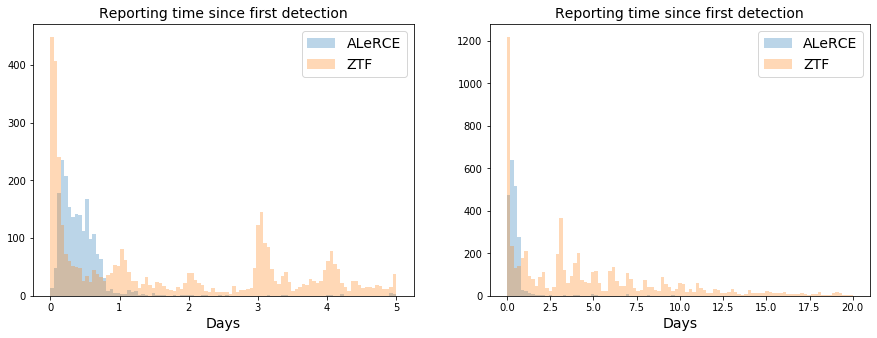

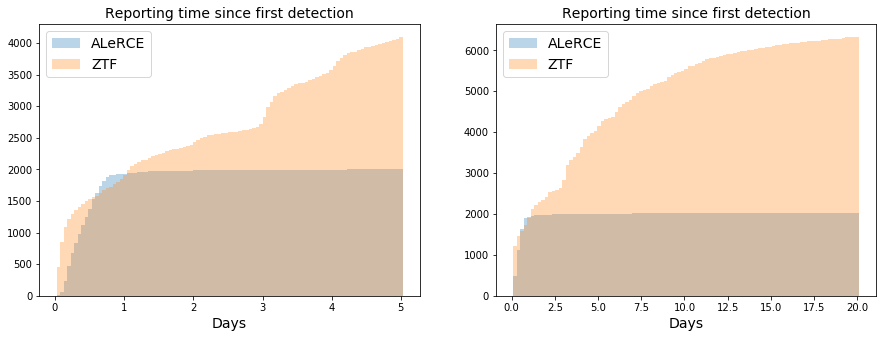

In [25]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

density_hist = False

upper_bound=5
bins = np.linspace(0, upper_bound, num=100)
alerce_report = t_alerce.mjd - summary_alerce.first_mjd
ztf_report = t_ztf.mjd - summary_ztf.first_mjd

alerce_cum_1, _, _ = ax[0].hist(t_alerce.mjd - summary_alerce.first_mjd, 
                              bins=bins, label="ALeRCE", alpha=0.3, density=density_hist)
ztf_cum_1, _, _ = ax[0].hist(t_ztf.mjd - summary_ztf.first_mjd, 
                           bins=bins, label="ZTF", alpha=0.3, density=density_hist)
ax[0].set_xlabel("Days", fontsize=14)
ax[0].set_title("Reporting time since first detection", fontsize=14)
ax[0].legend(fontsize=14)

upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
alerce_cum_2, _, _ = ax[1].hist(t_alerce.mjd - summary_alerce.first_mjd, bins=bins, label="ALeRCE", alpha=0.3, density=density_hist)
ztf_cum_2, _, _ = ax[1].hist(t_ztf.mjd - summary_ztf.first_mjd, bins=bins, label="ZTF", alpha=0.3, density=density_hist)
ax[1].set_xlabel("Days", fontsize=14)
ax[1].set_title("Reporting time since first detection", fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

if density_hist:
    alerce_cum_1 = alerce_cum_1/np.sum(alerce_cum_1)
    alerce_cum_2 = alerce_cum_2/np.sum(alerce_cum_2)
    ztf_cum_1 = ztf_cum_1/np.sum(ztf_cum_1)
    ztf_cum_2 = ztf_cum_2/np.sum(ztf_cum_2)

#### CUMULATIVE ####
f, ax = plt.subplots(1, 2, figsize=(15, 5))
upper_bound=5
bins = np.linspace(0, upper_bound, num=100)
dbins = np.diff(bins)
width = dbins[0]
ax[0].bar(bins[1:], np.cumsum(alerce_cum_1), label="ALeRCE", alpha=0.3, width=width)
ax[0].bar(bins[1:], np.cumsum(ztf_cum_1), label="ZTF", alpha=0.3, width=width)
ax[0].set_xlabel("Days", fontsize=14)
ax[0].set_title("Reporting time since first detection", fontsize=14)
ax[0].legend(fontsize=14)

upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
dbins = np.diff(bins)
width = dbins[0]
ax[1].bar(bins[1:], np.cumsum(alerce_cum_2), label="ALeRCE", alpha=0.3, width=width)
ax[1].bar(bins[1:], np.cumsum(ztf_cum_2), label="ZTF", alpha=0.3, width=width)
ax[1].set_xlabel("Days", fontsize=14)
ax[1].set_title("Reporting time since first detection", fontsize=14)
ax[1].legend(fontsize=14)
plt.show()

## Reporting time one detection

In [26]:
summary_alerce.columns

Index(['oid', 'nobs', 'dt', 'dt2', 'dmag', 'dt_fid', 'dmag_fid', 'first_mjd',
       'first_det_mag', 'ra', 'dec', 'dt_first_max', 'dmag_first_max',
       'mag_at_max', 'dmdt_fid', 'first_UT'],
      dtype='object')

one detection 688
two detection 1338


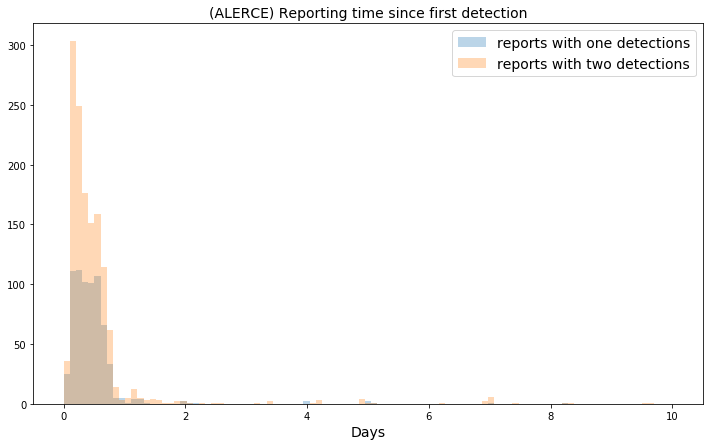

In [27]:
alerce_report_one_dt = []
alerce_report_two_dt = []

for i, d in enumerate(summary_alerce.dt2):
    if np.isnan(d):
        alerce_report_one_dt.append(alerce_report[i])
    else:
        alerce_report_two_dt.append(alerce_report[i])

print("one detection", len(alerce_report_one_dt))
print("two detection", len(alerce_report_two_dt))

upper_bound=10
bins = np.linspace(0, upper_bound, num=100)
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.hist(alerce_report_one_dt, bins=bins, label="reports with one detections", alpha=0.3, density=False)
ax.hist(alerce_report_two_dt, bins=bins, label="reports with two detections", alpha=0.3, density=False)
ax.set_xlabel("Days", fontsize=14)
ax.set_title("(ALERCE) Reporting time since first detection", fontsize=14)
ax.legend(fontsize=14)
plt.show()

one detection 352
two detection 7831


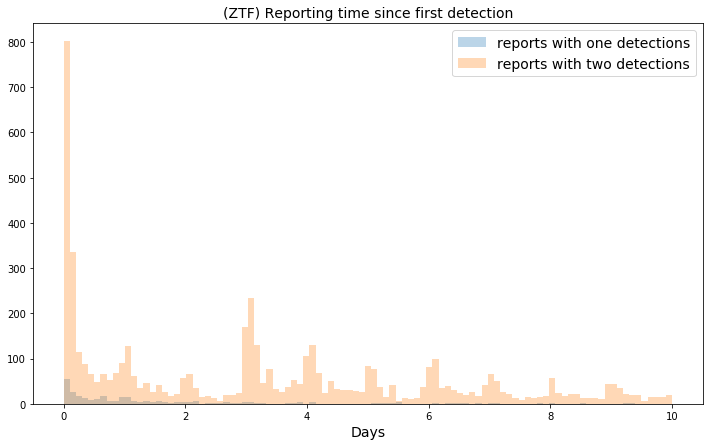

In [28]:
ztf_report_one_dt = []
ztf_report_two_dt = []
single_dt_ztf_reports = []

for i, d in enumerate(summary_ztf.dt2):
    if np.isnan(d):
        ztf_report_one_dt.append(ztf_report[i])
        single_dt_ztf_reports.append(summary_ztf.oid[i])
    else:
        ztf_report_two_dt.append(ztf_report[i])

print("one detection", len(ztf_report_one_dt))
print("two detection", len(ztf_report_two_dt))

upper_bound=10
bins = np.linspace(0, upper_bound, num=100)
f, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.hist(ztf_report_one_dt, bins=bins, label="reports with one detections", alpha=0.3, density=False)
ax.hist(ztf_report_two_dt, bins=bins, label="reports with two detections", alpha=0.3, density=False)
ax.set_xlabel("Days", fontsize=14)
ax.set_title("(ZTF) Reporting time since first detection", fontsize=14)
ax.legend(fontsize=14)
plt.show()

In [29]:
single_dt_ztf_reports

['ZTF20aaqmrub',
 'ZTF20aanloyz',
 'ZTF20aamvnat',
 'ZTF20aalyzmg',
 'ZTF20aahgnpf',
 'ZTF20aadyati',
 'ZTF20aaeihti',
 'ZTF20aakjbvd',
 'ZTF19adajcpn',
 'ZTF20aaidbez',
 'ZTF18adhejlo',
 'ZTF20aagjqxg',
 'ZTF20aafebsm',
 'ZTF19ackrvio',
 'ZTF20aaefyzd',
 'ZTF20aaeccig',
 'ZTF18acfrxzs',
 'ZTF20aadbwvc',
 'ZTF19aatlzsu',
 'ZTF19abyndjf',
 'ZTF19acbqtue',
 'ZTF19accdgqk',
 'ZTF20aaeyzfp',
 'ZTF19acklbte',
 'ZTF19acymlhi',
 'ZTF19acymaxu',
 'ZTF19acxpxvl',
 'ZTF19acvrnlw',
 'ZTF19acwrnyp',
 'ZTF19acvykiz',
 'ZTF19acwinbf',
 'ZTF19acvvyyh',
 'ZTF19acvvljo',
 'ZTF19acvvjjd',
 'ZTF19acvfvrt',
 'ZTF19acrwxra',
 'ZTF19acrwxju',
 'ZTF19acrwred',
 'ZTF19acrwrbq',
 'ZTF19acrvszx',
 'ZTF19acrwlnc',
 'ZTF19acruoro',
 'ZTF19acryyih',
 'ZTF19acryruw',
 'ZTF19acrymna',
 'ZTF19acrwjeb',
 'ZTF19acqnmjo',
 'ZTF19aajtahi',
 'ZTF19acoaxdr',
 'ZTF19acobeqa',
 'ZTF19acnvoay',
 'ZTF19acmljox',
 'ZTF19acmgoui',
 'ZTF19abyjmhl',
 'ZTF19abakntv',
 'ZTF19aawgqot',
 'ZTF19aavrhao',
 'ZTF19aarvsha',
 'ZTF19aaimcgv

In [30]:
all_alerce.columns

Index(['ID', 'Name', 'RA', 'DEC', 'Obj. Type', 'Redshift', 'Host Name',
       'Host Redshift', 'Reporting Group/s', 'Discovery Data Source/s',
       'Classifying Group/s', 'Associated Group/s', 'Disc. Internal Name',
       'Disc. Instrument/s', 'Class. Instrument/s', 'TNS AT', 'Public',
       'End Prop. Period', 'Discovery Mag/Flux', 'Discovery Filter',
       'Discovery Date (UT)', 'Sender', 'Remarks', 'Ext. catalog/s', 'url'],
      dtype='object')

## Spectroscopically confirmed

In [31]:
alerce_classified_mask = ~(all_alerce["Classifying Group/s"].isna())
ztf_classified_mask = ~(all_ztf["Classifying Group/s"].isna())

ALeRCE confirmed 301
ZTF confirmed 1741


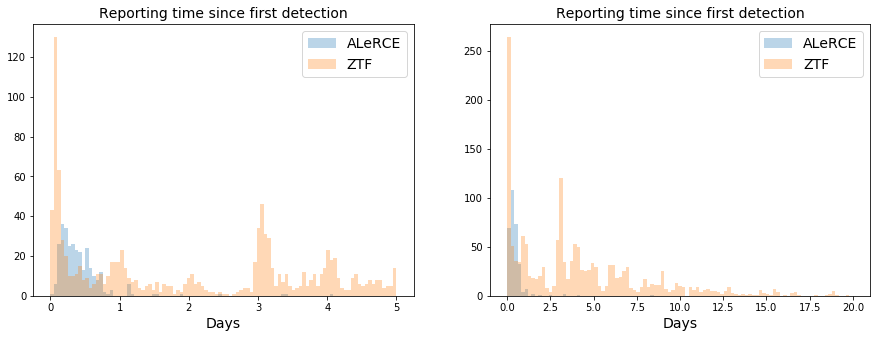

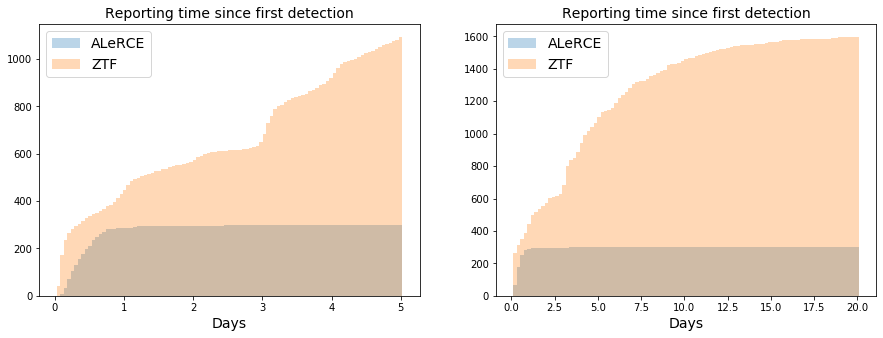

In [32]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

density_hist = False

upper_bound=5
bins = np.linspace(0, upper_bound, num=100)

alerce_report = []
ztf_report = []

alerce_confirmed_mask = []
ztf_confirmed_mask = []

for i in range(len(summary_ztf)):
    summary_row = summary_ztf.loc[i]
    row = all_ztf[all_ztf["Disc. Internal Name"] == summary_row.oid].iloc[0]
    if isinstance(row["Classifying Group/s"], str):
        ztf_confirmed_mask.append(i)
    else:
        continue
        
for i in range(len(summary_alerce)):
    summary_row = summary_alerce.loc[i]
    row = all_alerce[all_alerce["Disc. Internal Name"] == summary_row.oid].iloc[0]
    if isinstance(row["Classifying Group/s"], str):
        alerce_confirmed_mask.append(i)
    else:
        continue
        

print("ALeRCE confirmed", len(alerce_confirmed_mask))
print("ZTF confirmed", len(ztf_confirmed_mask))
        
alerce_report = t_alerce.mjd - summary_alerce.first_mjd
ztf_report = t_ztf.mjd - summary_ztf.first_mjd

alerce_report = alerce_report[alerce_confirmed_mask]
ztf_report = ztf_report[ztf_confirmed_mask]

alerce_cum_1, _, _ = ax[0].hist(alerce_report, 
                              bins=bins, label="ALeRCE", alpha=0.3, density=density_hist)
ztf_cum_1, _, _ = ax[0].hist(ztf_report, 
                           bins=bins, label="ZTF", alpha=0.3, density=density_hist)
ax[0].set_xlabel("Days", fontsize=14)
ax[0].set_title("Reporting time since first detection", fontsize=14)
ax[0].legend(fontsize=14)

upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
alerce_cum_2, _, _ = ax[1].hist(alerce_report, bins=bins, label="ALeRCE", alpha=0.3, density=density_hist)
ztf_cum_2, _, _ = ax[1].hist(ztf_report, bins=bins, label="ZTF", alpha=0.3, density=density_hist)
ax[1].set_xlabel("Days", fontsize=14)
ax[1].set_title("Reporting time since first detection", fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

if density_hist:
    alerce_cum_1 = alerce_cum_1/np.sum(alerce_cum_1)
    alerce_cum_2 = alerce_cum_2/np.sum(alerce_cum_2)
    ztf_cum_1 = ztf_cum_1/np.sum(ztf_cum_1)
    ztf_cum_2 = ztf_cum_2/np.sum(ztf_cum_2)

#### CUMULATIVE ####
f, ax = plt.subplots(1, 2, figsize=(15, 5))
upper_bound=5
bins = np.linspace(0, upper_bound, num=100)
dbins = np.diff(bins)
width = dbins[0]
ax[0].bar(bins[1:], np.cumsum(alerce_cum_1), label="ALeRCE", alpha=0.3, width=width)
ax[0].bar(bins[1:], np.cumsum(ztf_cum_1), label="ZTF", alpha=0.3, width=width)
ax[0].set_xlabel("Days", fontsize=14)
ax[0].set_title("Reporting time since first detection", fontsize=14)
ax[0].legend(fontsize=14)

upper_bound=20
bins = np.linspace(0, upper_bound, num=100)
dbins = np.diff(bins)
width = dbins[0]
ax[1].bar(bins[1:], np.cumsum(alerce_cum_2), label="ALeRCE", alpha=0.3, width=width)
ax[1].bar(bins[1:], np.cumsum(ztf_cum_2), label="ZTF", alpha=0.3, width=width)
ax[1].set_xlabel("Days", fontsize=14)
ax[1].set_title("Reporting time since first detection", fontsize=14)
ax[1].legend(fontsize=14)
plt.show()

In [33]:
summary_alerce

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,dec,dt_first_max,dmag_first_max,mag_at_max,dmdt_fid,first_UT
0,ZTF20aaskdgf,1,8.969768,NaN,0.314535,9.009305,0.528034,58913.141944,19.593266,67.270614,-12.543713,0.000000,0.000000,19.593266,0.058610,3.400000
1,ZTF20aasmgqk,1,0.041782,NaN,1.305998,0.986863,1.561897,58913.276944,18.544903,162.499881,23.431558,0.000000,0.000000,18.544903,1.582688,6.633333
2,ZTF20aasoaeu,1,13.047940,NaN,0.811230,21.090706,-0.403469,58913.424155,19.380569,187.632292,-17.220212,0.000000,0.000000,19.380569,-0.019130,10.166667
3,ZTF20aaspdtp,1,0.960532,NaN,2.034286,1.001481,1.682087,58913.497350,18.730513,252.476105,53.946731,0.000000,0.000000,18.730513,1.679599,11.933333
4,ZTF20aaskbht,1,7.998947,NaN,0.273787,7.998947,0.273787,58913.130289,19.187313,38.255634,21.328905,0.000000,0.000000,19.187313,0.034228,3.116667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,ZTF19abjklyz,3,6.858507,9.953102,-0.542484,6.858507,-0.542484,58693.323009,20.741085,330.443201,29.849292,3.094595,0.365274,20.375811,-0.079097,7.750000
2022,ZTF19abjobyp,1,2.937280,NaN,-0.100792,3.013194,-0.045492,58693.394329,20.273191,336.647484,-5.944884,0.000000,0.000000,20.273191,-0.015098,9.450000
2023,ZTF19abjppqv,11,2.994062,5.975822,0.305964,2.994062,0.305964,58693.457072,19.898537,18.495533,-2.156206,10.042234,0.545441,19.353096,0.102190,10.966667
2024,ZTF19abjpqlc,6,7.042199,12.015474,-2.207703,7.042199,-2.207703,58693.459965,20.039202,348.160126,-26.859484,15.021053,0.478817,19.560385,-0.313496,11.033333


# Using one or two detections

In [3]:
all_alerce = pd.read_pickle("all_alerce.pkl")
summary_alerce = pd.read_pickle("alerce_summary_tns.pkl")

all_ztf = pd.read_pickle("all_ztf.pkl")
summary_ztf = pd.read_pickle("ztf_summary_tns.pkl")

reported_alerce = pd.read_pickle("alerce_reporting_time.pkl")
reported_ztf = pd.read_pickle("ztf_reporting_time.pkl")

summary_alerce["first_UT"] = summary_alerce.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)
summary_ztf["first_UT"] = summary_ztf.apply(lambda row: float(Time(row["first_mjd"], format='mjd').datetime.hour) + float(Time(row["first_mjd"], format='mjd').datetime.minute) / 60., axis=1)

alerce_rep_utc = []
for i in range(len(reported_alerce["reporting_date"])):
    alerce_rep_utc.append(reported_alerce["reporting_date"][i]+"T"+reported_alerce["reporting_time"][i])

t_alerce = Time(alerce_rep_utc, format='isot', scale='utc')
summary_alerce["reporting_mjd"] = t_alerce.mjd

ztf_rep_utc = []
for i in range(len(reported_ztf["reporting_date"])):
    ztf_rep_utc.append(reported_ztf["reporting_date"][i]+"T"+reported_ztf["reporting_time"][i])
t_ztf = Time(ztf_rep_utc, format='isot', scale='utc')
summary_ztf["reporting_mjd"] = t_ztf.mjd

summary_alerce["second_mjd"] = summary_alerce["first_mjd"] + (summary_alerce["dt2"] - summary_alerce["dt"])
summary_ztf["second_mjd"] = summary_ztf["first_mjd"] + (summary_ztf["dt2"] - summary_ztf["dt"])

ztf_confirmed = []
reporting_group = []
for i in range(len(summary_ztf)):
    summary_row = summary_ztf.loc[i]
    row = all_ztf[all_ztf["Disc. Internal Name"] == summary_row.oid].iloc[0]
    reporting_group.append(row["Reporting Group/s"])
    if isinstance(row["Classifying Group/s"], str):
        ztf_confirmed.append(True)
    else:
        ztf_confirmed.append(False)
summary_ztf["confirmed"] = ztf_confirmed
summary_ztf["reporting_group"] = reporting_group

alerce_confirmed = []
reporting_group = []
for i in range(len(summary_alerce)):
    summary_row = summary_alerce.loc[i]
    row = all_alerce[all_alerce["Disc. Internal Name"] == summary_row.oid].iloc[0]
    reporting_group.append(row["Reporting Group/s"])
    if isinstance(row["Classifying Group/s"], str):
        alerce_confirmed.append(True)
    else:
        alerce_confirmed.append(False)
summary_alerce["confirmed"] = alerce_confirmed
summary_alerce["reporting_group"] = reporting_group

In [4]:
np.amax(summary_alerce["first_mjd"])

58913.5266550998

In [5]:
summary_alerce["report_from_first_det"] = summary_alerce.reporting_mjd - summary_alerce.first_mjd
summary_ztf["report_from_first_det"] = summary_ztf.reporting_mjd - summary_ztf.first_mjd
print("average reporting time since first detection")
print(np.mean(summary_alerce.report_from_first_det), 
      np.quantile(summary_alerce.report_from_first_det, 0.25),
      np.quantile(summary_alerce.report_from_first_det, 0.75))

average reporting time since first detection
0.5104316277420375 0.20903935928436113 0.5523698009765212


In [6]:
summary_alerce["one_det_when_rep"] = np.logical_or(summary_alerce.second_mjd > summary_alerce.reporting_mjd, summary_alerce.dt2.isna())
summary_ztf["one_det_when_rep"] = np.logical_or(summary_ztf.second_mjd > summary_ztf.reporting_mjd, summary_ztf.dt2.isna())

print("ALeRCE Reported with one detection")
print(np.sum(summary_alerce.one_det_when_rep))
print("ALeRCE Reported with two detections")
print(np.sum(~summary_alerce.one_det_when_rep))
print("total:", len(summary_alerce))

print("ALeRCE Reported with one detection")
print(np.sum(summary_ztf.one_det_when_rep))
print("ALeRCE Reported with two detections")
print(np.sum(~summary_ztf.one_det_when_rep))
print("total:", len(summary_alerce))

summary_alerce["one_det_available"] = summary_alerce.dt2.isna()
summary_ztf["one_det_available"] = summary_ztf.dt2.isna()

display(summary_ztf[summary_ztf.report_from_first_det<0])

summary_ztf = summary_ztf[summary_ztf.report_from_first_det > 0]

ALeRCE Reported with one detection
1456
ALeRCE Reported with two detections
570
total: 2026
ALeRCE Reported with one detection
935
ALeRCE Reported with two detections
7248
total: 2026


,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
297,ZTF20aamvoxx,3,2.940787,5.961377,-1.212839,2.940787,-1.212839,58893.161482,19.932539,39.399280,...,19.789900,-0.412420,3.866667,58892.275891,58896.182072,False,ZTF,-0.885590,True,False
298,ZTF20aamvmzj,3,2.978819,5.964502,0.364305,9.000174,-0.079594,58896.132812,20.019794,27.189126,...,20.019794,-0.008844,3.183333,58892.273507,58899.118495,False,ZTF,-3.859306,True,False
299,ZTF20aamvnat,1,2.912674,NaN,-0.318876,2.912674,-0.318876,58893.153993,19.176376,27.239494,...,19.176376,-0.109479,3.683333,58892.273403,NaN,False,ZTF,-0.880590,True,True
300,ZTF20aamvqxl,7,2.912674,5.891493,-1.624599,2.912674,-1.624599,58893.153993,20.385099,29.238058,...,19.883991,-0.557769,3.683333,58892.273287,58896.132812,False,ZTF,-0.880706,True,False
659,ZTF20aagjqxg,1,4.990984,NaN,-1.142334,5.013634,-1.252335,58872.138982,20.382935,44.912754,...,20.382935,-0.249786,3.333333,58866.611620,NaN,False,"ZTF, Pan-STARRS1",-5.527361,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8174,ZTF18aabsyqp,180,0.000926,5.068785,-0.124781,0.000926,-0.124781,58272.166840,19.587681,162.818492,...,18.816990,-134.766881,4.000000,58189.684780,58277.234699,True,ZTF,-82.482060,True,False
8175,ZTF18aabssth,83,NaN,168.357824,NaN,NaN,NaN,58427.476921,19.307535,165.189082,...,18.949932,NaN,11.433333,58189.684780,NaN,True,"ZTF, GaiaAlerts",-237.792141,False,False
8176,ZTF18aaayemw,181,NaN,118.343009,NaN,NaN,NaN,58387.490151,19.448446,134.898319,...,19.081806,NaN,11.750000,58177.318646,NaN,True,ZTF,-210.171505,False,False
8177,ZTF18aaaoaeq,51,5.933611,160.306956,-0.159714,5.933611,-0.159714,58272.165440,19.502014,155.540739,...,19.340698,-0.026917,3.966667,58149.329329,58426.538785,True,"ZTF, Pan-STARRS1",-122.836111,True,False


In [7]:
summary_ztf

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
0,ZTF20aaovpbz,5,3.024965,5.979005,-0.460400,3.024965,-0.460400,58895.380440,20.012300,162.922085,...,19.211355,-0.152200,9.116667,58913.259537,58898.334479,False,ZTF,17.879097,False,False
1,ZTF20aaskdhj,2,8.967963,9.004398,1.611460,9.007500,1.835760,58913.141042,18.572840,74.783558,...,18.252647,0.203804,3.383333,58913.217870,58913.177477,False,ZTF,0.076829,False,False
2,ZTF20aaskblh,2,7.991655,8.040336,1.335119,7.991655,1.335119,58913.131655,18.300781,28.747990,...,18.300781,0.167064,3.150000,58913.217870,58913.180336,False,ZTF,0.086215,False,False
3,ZTF20aarbvey,5,5.915845,10.937442,0.787300,5.959363,1.091501,58900.127049,18.997999,90.574442,...,18.966084,0.183157,3.033333,58913.176192,58905.148646,False,ZTF,13.049144,False,False
4,ZTF20aasjzhg,2,8.942477,8.985949,2.883730,8.974884,3.228231,58913.119630,17.130569,44.583247,...,17.130569,0.359696,2.866667,58913.176169,58913.163102,False,ZTF,0.056539,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,ZTF18aauuqrh,6,21.937859,29.022813,1.676746,21.937859,1.676746,58270.170417,18.787554,186.359331,...,18.787554,0.076432,4.083333,58272.228796,58277.255370,False,ZTF,2.058380,True,False
8178,ZTF18aaevepq,30,NaN,165.293241,NaN,NaN,NaN,58385.526273,19.157137,137.328877,...,19.058086,NaN,12.616667,58442.618009,NaN,False,"ZTF, iPTF",57.091736,False,False
8179,ZTF18aahqsad,17,NaN,163.306296,NaN,NaN,NaN,58425.481863,19.447134,150.611554,...,18.598646,NaN,11.550000,58433.571470,NaN,False,"ZTF, iPTF",8.089607,False,False
8180,ZTF18aagajuk,60,NaN,160.199433,NaN,NaN,NaN,58423.517199,19.692928,119.739628,...,19.365219,NaN,12.400000,58432.597616,NaN,False,"ZTF, iPTF",9.080417,False,False


In [32]:
def purity_single_detection(df):
    one_rep_one_av = np.logical_and(df.one_det_when_rep, df.one_det_available)
    one_rep_two_av = np.logical_and(df.one_det_when_rep, np.logical_not(df.one_det_available))
    two_rep_two_av = np.logical_and(np.logical_not(df.one_det_when_rep), np.logical_not(df.one_det_available))
    print("Reported with one, one det available", np.sum(one_rep_one_av))
    print("Reported with one, two det available", np.sum(one_rep_two_av))
    print("Reported with two, two det available", np.sum(two_rep_two_av))
    print("Reported with two, one det available", np.sum(np.logical_and(np.logical_not(df.one_det_when_rep), df.one_det_available)))
    
    return one_rep_one_av, one_rep_two_av, two_rep_two_av

print("ALeRCE")
alerce_purity = purity_single_detection(summary_alerce)
print("purity using one detection", np.sum(alerce_purity[1])/(np.sum(alerce_purity[:2])))
print("Percentage of report within one day", len(summary_alerce[summary_alerce.report_from_first_det<1]))#/len(summary_alerce))

print("ZTF")
ztf_purity = purity_single_detection(summary_ztf)
print("purity using one detection", np.sum(ztf_purity[1])/(np.sum(ztf_purity[:2])))
print("Percentage of report within one day", len(summary_ztf[summary_ztf.report_from_first_det<1])/len(summary_ztf))

ALeRCE
Reported with one, one det available 688
Reported with one, two det available 768
Reported with two, two det available 570
Reported with two, one det available 0
purity using one detection 0.5274725274725275
Percentage of report within one day 1932
ZTF
Reported with one, one det available 332
Reported with one, two det available 456
Reported with two, two det available 7238
Reported with two, one det available 0
purity using one detection 0.5786802030456852
Percentage of report within one day 0.23635684026912535


# Histogram by number of detection when reporting

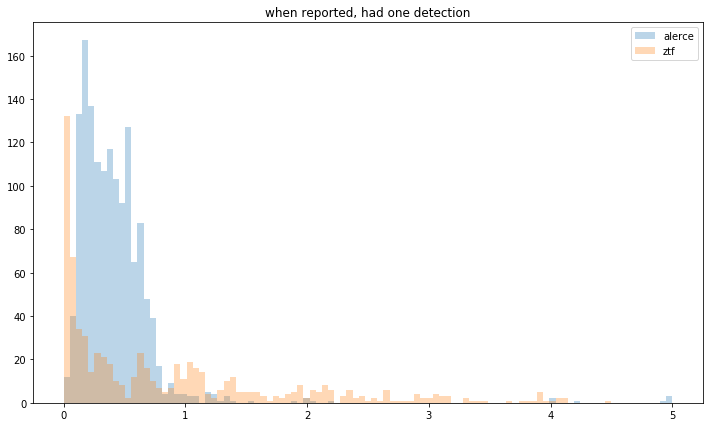

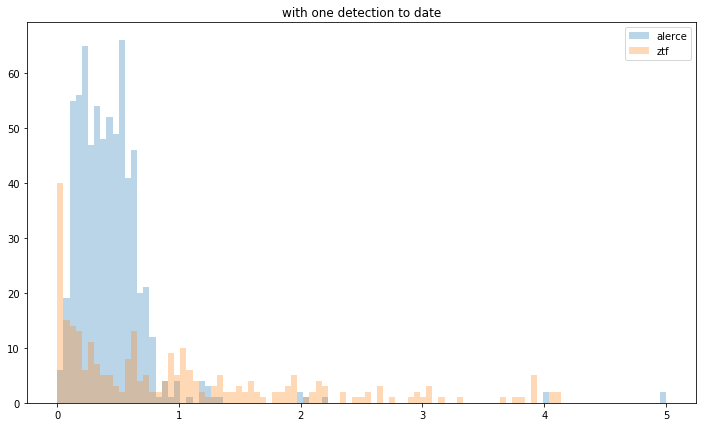

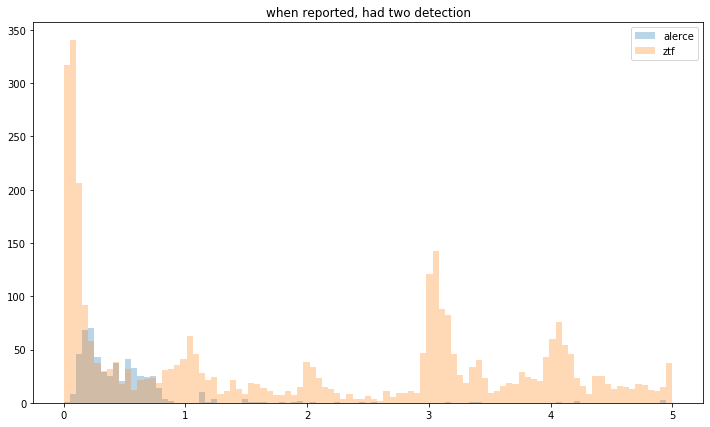

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 7))

bins = np.linspace(0, 5, num=100)
density = False
ax.hist(summary_alerce[summary_alerce.one_det_when_rep==1].report_from_first_det, bins=bins, label="alerce", alpha=0.3, density=density)
ax.hist(summary_ztf[summary_ztf.one_det_when_rep==1].report_from_first_det, bins=bins, label="ztf", alpha=0.3, density=density)
plt.legend()
ax.set_title("when reported, had one detection")
plt.show()

f, ax = plt.subplots(1, 1, figsize=(12, 7))

bins = np.linspace(0, 5, num=100)
ax.hist(summary_alerce[summary_alerce.one_det_available==1].report_from_first_det, bins=bins, label="alerce", alpha=0.3, density=density)
ax.hist(summary_ztf[summary_ztf.one_det_available==1].report_from_first_det, bins=bins, label="ztf", alpha=0.3, density=density)
ax.set_title("with one detection to date")
plt.legend()
plt.show()

f, ax = plt.subplots(1, 1, figsize=(12, 7))

bins = np.linspace(0, 5, num=100)
ax.hist(summary_alerce[summary_alerce.one_det_when_rep==0].report_from_first_det, bins=bins, label="alerce", alpha=0.3, density=density)
ax.hist(summary_ztf[summary_ztf.one_det_when_rep==0].report_from_first_det, bins=bins, label="ztf", alpha=0.3, density=density)
plt.legend()
ax.set_title("when reported, had two detection")
plt.show()

# Confirmed with one detection

In [10]:
print("ALeRCE")
print("Confirmed and reported with one detection", np.sum(np.logical_and(summary_alerce.one_det_when_rep, summary_alerce.confirmed)))
print("Reported with one detection", np.sum(summary_alerce.one_det_when_rep))

print("ZTF")
print("Confirmed and reported with one detection", np.sum(np.logical_and(summary_ztf.one_det_when_rep, summary_ztf.confirmed)))
print("Reported with one detection", np.sum(summary_ztf.one_det_when_rep))

ALeRCE
Confirmed and reported with one detection 176
Reported with one detection 1456
ZTF
Confirmed and reported with one detection 104
Reported with one detection 788


# Only by alerce

In [40]:
print(np.unique(all_ztf["Reporting Group/s"].values))
alerce_and_ztf = []
for i in range(len(all_ztf)):
    row = all_ztf.iloc[i]
    if "ALeRCE" in row["Reporting Group/s"]:
        alerce_and_ztf.append(row)
print(alerce_and_ztf)

['ZTF' 'ZTF, ALeRCE' 'ZTF, ALeRCE, ATLAS, Pan-STARRS1, GaiaAlerts'
 'ZTF, ATLAS' 'ZTF, ATLAS, ASAS-SN' 'ZTF, ATLAS, GOTO, GaiaAlerts'
 'ZTF, ATLAS, GaiaAlerts' 'ZTF, ATLAS, GaiaAlerts, Pan-STARRS1'
 'ZTF, ATLAS, MASTER' 'ZTF, ATLAS, MASTER, GaiaAlerts, Pan-STARRS1'
 'ZTF, ATLAS, PIKA' 'ZTF, ATLAS, Pan-STARRS1'
 'ZTF, ATLAS, Pan-STARRS1, GaiaAlerts' 'ZTF, ATLAS, Pan-STARRS1, MASTER'
 'ZTF, ATLAS, TNTS, Pan-STARRS1, GaiaAlerts' 'ZTF, ATLAS, YSE'
 'ZTF, ATLAS, YSE, GaiaAlerts' 'ZTF, ATLAS, YSE, Pan-STARRS1'
 'ZTF, GaiaAlerts' 'ZTF, GaiaAlerts, ATLAS' 'ZTF, GaiaAlerts, ATLAS, GOTO'
 'ZTF, GaiaAlerts, ATLAS, Pan-STARRS1' 'ZTF, GaiaAlerts, Pan-STARRS1'
 'ZTF, GaiaAlerts, Pan-STARRS1, ATLAS' 'ZTF, Gattini' 'ZTF, MASTER'
 'ZTF, MASTER, Pan-STARRS1, ATLAS' 'ZTF, Pan-STARRS1'
 'ZTF, Pan-STARRS1, ATLAS' 'ZTF, Pan-STARRS1, ATLAS, GaiaAlerts'
 'ZTF, Pan-STARRS1, GaiaAlerts' 'ZTF, Pan-STARRS1, GaiaAlerts, ATLAS'
 'ZTF, Pan-STARRS1, MASTER' 'ZTF, YSE' 'ZTF, YSE, Pan-STARRS1' 'ZTF, iPTF']
[ID         

In [12]:
only_alerce_mask = summary_alerce["reporting_group"] == "ALeRCE"

In [13]:
summary_alerce[np.logical_and(only_alerce_mask.values, summary_alerce.one_det_available)]

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
0,ZTF20aaskdgf,1,8.969768,NaN,0.314535,9.009305,0.528034,58913.141944,19.593266,67.270614,...,19.593266,0.058610,3.400000,58913.742303,NaN,False,ALeRCE,0.600359,True,True
1,ZTF20aasmgqk,1,0.041782,NaN,1.305998,0.986863,1.561897,58913.276944,18.544903,162.499881,...,18.544903,1.582688,6.633333,58913.742303,NaN,False,ALeRCE,0.465359,True,True
2,ZTF20aasoaeu,1,13.047940,NaN,0.811230,21.090706,-0.403469,58913.424155,19.380569,187.632292,...,19.380569,-0.019130,10.166667,58913.742303,NaN,False,ALeRCE,0.318148,True,True
3,ZTF20aaspdtp,1,0.960532,NaN,2.034286,1.001481,1.682087,58913.497350,18.730513,252.476105,...,18.730513,1.679599,11.933333,58913.742303,NaN,False,ALeRCE,0.244954,True,True
4,ZTF20aaskbht,1,7.998947,NaN,0.273787,7.998947,0.273787,58913.130289,19.187313,38.255634,...,19.187313,0.034228,3.116667,58913.742303,NaN,False,ALeRCE,0.612014,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,ZTF19abjouta,1,3.002928,NaN,-0.088978,9.013762,-1.555578,58693.418924,20.415478,357.880495,...,20.415478,-0.172578,10.050000,58698.389653,NaN,False,ALeRCE,4.970729,True,True
2010,ZTF19abiiitl,1,4.000289,NaN,0.130772,9.935243,-0.342728,58690.168981,19.884129,220.462893,...,19.884129,-0.034496,4.050000,58698.389653,NaN,False,ALeRCE,8.220671,True,True
2013,ZTF19abiypsz,1,5.931678,NaN,-1.007864,5.973715,-0.611263,58691.391968,20.415764,327.400216,...,20.415764,-0.102325,9.400000,58698.389653,NaN,False,ALeRCE,6.997685,True,True
2020,ZTF19abjiqfw,1,1.063553,NaN,-1.384394,4.942685,-0.252893,58693.246447,20.439493,208.340275,...,20.439493,-0.051165,5.900000,58698.389653,NaN,False,ALeRCE,5.143206,True,True


In [14]:
summary_alerce[summary_alerce.one_det_available]

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
0,ZTF20aaskdgf,1,8.969768,NaN,0.314535,9.009305,0.528034,58913.141944,19.593266,67.270614,...,19.593266,0.058610,3.400000,58913.742303,NaN,False,ALeRCE,0.600359,True,True
1,ZTF20aasmgqk,1,0.041782,NaN,1.305998,0.986863,1.561897,58913.276944,18.544903,162.499881,...,18.544903,1.582688,6.633333,58913.742303,NaN,False,ALeRCE,0.465359,True,True
2,ZTF20aasoaeu,1,13.047940,NaN,0.811230,21.090706,-0.403469,58913.424155,19.380569,187.632292,...,19.380569,-0.019130,10.166667,58913.742303,NaN,False,ALeRCE,0.318148,True,True
3,ZTF20aaspdtp,1,0.960532,NaN,2.034286,1.001481,1.682087,58913.497350,18.730513,252.476105,...,18.730513,1.679599,11.933333,58913.742303,NaN,False,ALeRCE,0.244954,True,True
4,ZTF20aaskbht,1,7.998947,NaN,0.273787,7.998947,0.273787,58913.130289,19.187313,38.255634,...,19.187313,0.034228,3.116667,58913.742303,NaN,False,ALeRCE,0.612014,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,ZTF19abjouta,1,3.002928,NaN,-0.088978,9.013762,-1.555578,58693.418924,20.415478,357.880495,...,20.415478,-0.172578,10.050000,58698.389653,NaN,False,ALeRCE,4.970729,True,True
2010,ZTF19abiiitl,1,4.000289,NaN,0.130772,9.935243,-0.342728,58690.168981,19.884129,220.462893,...,19.884129,-0.034496,4.050000,58698.389653,NaN,False,ALeRCE,8.220671,True,True
2013,ZTF19abiypsz,1,5.931678,NaN,-1.007864,5.973715,-0.611263,58691.391968,20.415764,327.400216,...,20.415764,-0.102325,9.400000,58698.389653,NaN,False,ALeRCE,6.997685,True,True
2020,ZTF19abjiqfw,1,1.063553,NaN,-1.384394,4.942685,-0.252893,58693.246447,20.439493,208.340275,...,20.439493,-0.051165,5.900000,58698.389653,NaN,False,ALeRCE,5.143206,True,True


In [15]:
summary_alerce[np.logical_and(only_alerce_mask.values, summary_alerce.confirmed)]

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
140,ZTF20aaodhzr,2,6.957338,26.022292,-0.642729,6.979097,-0.218029,58895.479919,18.751329,214.768373,...,18.751329,-0.031240,11.516667,58895.702778,58914.544873,True,ALeRCE,0.222859,True,False
184,ZTF20aanafck,6,NaN,5.988461,NaN,NaN,NaN,58892.529074,18.568897,295.503721,...,18.568897,NaN,12.683333,58892.855775,NaN,True,ALeRCE,0.326701,False,False
189,ZTF20aamxhlg,9,6.096551,8.975961,-0.144323,7.103183,-0.919825,58892.282789,19.447424,88.857075,...,19.447424,-0.129495,6.783333,58892.855775,58895.162199,True,ALeRCE,0.572986,True,False
193,ZTF20aamwfea,5,13.958958,16.979340,2.563034,13.958958,2.563034,58892.251331,17.005865,129.088531,...,17.005865,0.183612,6.016667,58892.855775,58895.271713,True,ALeRCE,0.604444,True,False
266,ZTF20aalbtwh,13,0.989074,1.045289,-0.856300,0.989074,-0.856300,58880.097164,20.239700,23.105374,...,18.020464,-0.865760,2.316667,58880.833970,58880.153380,True,ALeRCE,0.736806,False,False
267,ZTF18adcdcrd,27,0.913530,2.937245,0.335104,0.967627,0.398304,58879.203137,19.678196,104.608503,...,18.152224,0.411630,4.866667,58879.951910,58881.226852,True,ALeRCE,0.748773,True,False
543,ZTF20aadymod,1,2.966829,NaN,4.997044,2.966829,4.997044,58853.539653,14.972757,215.376526,...,14.972757,1.684305,12.950000,58853.659271,NaN,True,ALeRCE,0.119618,True,True
701,ZTF19adccckb,5,0.031389,0.077060,0.412451,0.031389,0.412451,58846.455729,20.170250,156.203228,...,20.087101,13.140021,10.933333,58846.681609,58846.501401,True,ALeRCE,0.225880,False,False
769,ZTF19adakcrw,4,2.948102,2.996424,-1.116701,3.060544,-0.878500,58836.508414,20.350201,172.960924,...,20.239864,-0.287040,12.200000,58836.667338,58836.556736,True,ALeRCE,0.158924,False,False
778,ZTF19adakacw,1,0.045880,NaN,-0.015821,13.041655,-1.442223,58836.552315,20.319422,156.028532,...,20.319422,-0.110586,13.250000,58836.667338,NaN,True,ALeRCE,0.115023,True,True


In [16]:
summary_alerce[np.logical_and(~only_alerce_mask.values, summary_alerce.confirmed)]

,oid,nobs,dt,dt2,dmag,dt_fid,dmag_fid,first_mjd,first_det_mag,ra,...,mag_at_max,dmdt_fid,first_UT,reporting_mjd,second_mjd,confirmed,reporting_group,report_from_first_det,one_det_when_rep,one_det_available
73,ZTF20aarbget,3,0.059167,6.997512,0.968628,5.037361,1.199928,58904.499236,19.151672,204.987784,...,16.455729,0.238206,11.966667,58905.060567,58911.437581,True,"ALeRCE, ZTF, ATLAS",0.561331,True,False
90,ZTF20aaqshoz,7,4.959687,5.024294,1.064447,4.959687,1.064447,58903.459074,19.689152,223.376570,...,17.181702,0.214620,11.016667,58904.012824,58903.523681,True,"ALeRCE, ATLAS, ZTF",0.553750,False,False
105,ZTF20aaqbach,11,0.996516,3.915856,0.473295,0.996516,0.473295,58900.437523,20.267805,187.036134,...,19.323118,0.474950,10.500000,58900.839549,58903.356863,True,"ALeRCE, ATLAS, ZTF",0.402026,True,False
112,ZTF20aapycrh,21,0.067708,3.059178,1.220642,0.958831,1.596542,58900.326366,19.215557,164.245258,...,18.495300,1.665093,7.816667,58900.839549,58903.317836,True,"ALeRCE, ZTF",0.513183,True,False
115,ZTF20aapjiwl,7,0.947106,3.953322,0.994902,0.947106,0.994902,58900.208426,19.724398,142.988640,...,17.661112,1.050464,5.000000,58900.839549,58903.214641,True,"ALeRCE, ATLAS, ZTF",0.631123,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,ZTF19abmolyr,49,0.073947,3.014062,1.418861,6.019282,1.565561,58700.476632,19.458038,355.320034,...,17.026442,0.260091,11.433333,58700.705799,58703.416748,True,"ALeRCE, ISSP, GaiaAlerts, ATLAS, Pan-STARRS1, ZTF",0.229167,True,False
1972,ZTF19abnktws,11,5.965359,10.951447,0.957886,9.007222,0.806387,58700.176354,19.583714,236.679783,...,18.585630,0.089527,4.216667,58700.705799,58705.162442,True,"ALeRCE, ATLAS",0.529444,True,False
1982,ZTF19abjrjdw,25,3.991539,11.085243,2.326248,3.991539,2.326248,58698.169792,18.128851,257.774103,...,17.896830,0.582795,4.066667,58698.389653,58705.263495,True,"ALeRCE, ATLAS, GaiaAlerts",0.219861,True,False
1999,ZTF19ablqnuw,12,3.002072,9.943970,0.737362,3.002072,0.737362,58696.482211,19.882038,13.039999,...,18.977749,0.245618,11.566667,58698.389653,58703.424109,True,"ALeRCE, ATLAS, Pan-STARRS1",1.907442,True,False


In [17]:
np.sum(summary_ztf.one_det_when_rep)

788

In [24]:
print(np.sum(summary_alerce.one_det_when_rep)/len(summary_alerce))
print(np.sum(summary_ztf.one_det_when_rep)/len(summary_ztf))

np.sum(summary_ztf.one_det_when_rep)

0.7186574531095755
0.09818091203588337


788

In [19]:
# Detectamos mas rápido, 75% de los reportado es con una deteccion
# La mitad de las reportadas con una detección tienen más de dos detecciones (buenos candidates)
# La otra mitad podrían serlo
# Tenemos desventaja sobre datos privados, cuello de botella
# Muchos de los candidates reportados con una detección fueron reportados por otros grupos
# Somos capaces de entregar buenos candidatos, segunda fotometria para saber si es que hay algo

# Formated plot for paper

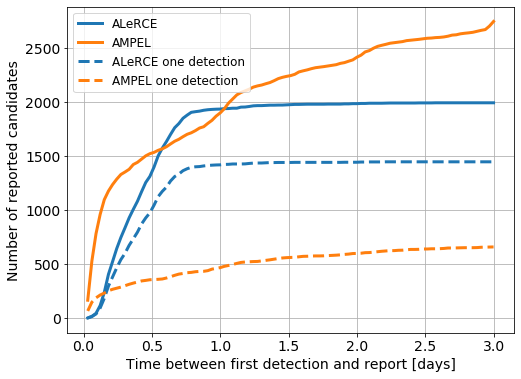

In [20]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.grid()
density=False
upper_bound = 3
bins = np.linspace(0, upper_bound, num=100)

alerce_full, _ = np.histogram(summary_alerce.report_from_first_det, bins=bins, density=density)
ztf_full, _ = np.histogram(summary_ztf.report_from_first_det, bins=bins, density=density)

alerce_one_dt, _ = np.histogram(summary_alerce[summary_alerce.one_det_when_rep].report_from_first_det, bins=bins, density=density)
ztf_one_dt, _ = np.histogram(summary_ztf[summary_ztf.one_det_when_rep].report_from_first_det, bins=bins, density=density)

ax.plot(bins[1:], np.cumsum(alerce_full), "C0" ,label="ALeRCE", lw=3)
ax.plot(bins[1:], np.cumsum(ztf_full), "C1" ,label="AMPEL", lw=3)
ax.plot(bins[1:], np.cumsum(alerce_one_dt), "C0--" ,label="ALeRCE one detection", lw=3)
ax.plot(bins[1:], np.cumsum(ztf_one_dt), "C1--" ,label="AMPEL one detection", lw=3)
plt.legend(fontsize=12)
plt.tick_params(labelsize=14)
ax.set_ylabel("Number of reported candidates", fontsize=14)
ax.set_xlabel("Time between first detection and report [days]", fontsize=14)
plt.savefig("plots/reporting_time.pdf", bbox_inches="tight")
plt.show()

In [23]:
for i in range(len(all_ztf)):
    name = all_ztf.iloc[i]["Name"].split(" ")[-1]
    print("https://wis-tns.weizmann.ac.il/object/"+name+"/discovery-cert")

https://wis-tns.weizmann.ac.il/object/2020eas/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020eai/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020eah/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020eag/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020eaf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020eae/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020ead/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020eac/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020eab/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020dzu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020dzt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020dyh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020dyg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020dyf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020dye/discovery-cert
https://wis-tns.weizmann.ac.il/object/2020dyd/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019zrx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zru/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrs/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zro/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zri/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019zrg/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019spm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sow/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sny/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sno/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019sng/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019snf/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019mdq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mdp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mdo/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mdn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mdm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mby/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbs/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019mbp/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019gmh/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gmg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gmf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gme/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gix/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019giw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019giv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019giu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019git/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gio/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gin/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gim/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gil/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gik/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gij/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019gii/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2019cqe/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cqd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cqc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cqb/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cqa/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpx/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpw/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpv/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpu/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpt/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cps/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpr/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2019cpp/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2018lpm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpi/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lph/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpe/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpd/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpc/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpb/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lpa/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018loz/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018loy/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018lox/discovery-cert
https://wis-tns.weizmann

https://wis-tns.weizmann.ac.il/object/2018iub/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018iua/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itq/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itp/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ito/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itn/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itm/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itl/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itk/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itj/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018iti/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ith/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itg/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itf/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018ite/discovery-cert
https://wis-tns.weizmann.ac.il/object/2018itd/discovery-cert
https://wis-tns.weizmann

In [47]:
np.random.binomial(1,0.5)

1